In [1]:
import numpy as np
import pandas as pd

# KNeighborsClassifier
# RandomForestClassifier
# SGDClassifier + StratifiedKFold

In [2]:
heart_data = pd.read_csv("./heart.csv")
o2_saturation_data = pd.read_csv("./o2Saturation.csv")

In [3]:
# cp, restecg

heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
for col in heart_data.columns:
    print(f"{col}: {pd.unique(heart_data[col])}\n")

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

sex: [1 0]

cp: [3 2 1 0]

trtbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]

fbs: [1

In [4]:
o2_saturation_data.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
heart_data.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [6]:
# from sklearn.model_selection import train_test_split

# heart_data_pre_train, heart_data_test = train_test_split(heart_data, 0.2)
# heart_data_train, heart_data_valid = train_test_split(heart_data_pre_train, 0.25)

# heart_data_train.head()

X = [1, 2, 4]
# heart_data.iloc[X]
heart_data.iloc[[0,1,2,3,4]]
total_len = len(heart_data)
np.random_seed = 11
permuted_indices = np.random.permutation(np.arange(total_len))

test_len = int(total_len * 0.2)
valid_len = int(total_len * 0.2)

test_indices = permuted_indices[:test_len]
valid_indices = permuted_indices[-valid_len:]
train_indices = permuted_indices[test_len:-valid_len]

test_heart_data = heart_data.iloc[test_indices]
test_y = heart_data[["output"]].iloc[test_indices]
test_y_data = test_y.values.ravel()

valid_heart_data = heart_data.iloc[valid_indices]
valid_y = heart_data[["output"]].iloc[valid_indices]
valid_y_data = valid_y.values.ravel()

train_heart_data = heart_data.iloc[train_indices]
train_y = heart_data[["output"]].iloc[train_indices]
train_y_data = train_y.values.ravel()

In [7]:
train_heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.133207,-0.065188,0.296125,0.159731,0.136442,-0.006353,-0.439339,0.123095,0.227043,-0.186536,0.228458,0.068370,-0.186407
sex,-0.133207,1.000000,-0.028347,-0.013686,-0.169267,0.035836,-0.021226,0.024413,0.171583,0.112845,-0.014050,0.085636,0.244390,-0.269258
cp,-0.065188,-0.028347,1.000000,-0.002538,-0.004891,0.085451,0.040730,0.274444,-0.345229,-0.131074,0.144415,-0.150265,-0.146007,0.407501
trtbps,0.296125,-0.013686,-0.002538,1.000000,0.065239,0.187543,-0.093410,-0.005286,0.152837,0.242119,-0.136135,0.136130,0.091328,-0.215303
chol,0.159731,-0.169267,-0.004891,0.065239,1.000000,0.000335,-0.143608,0.061555,0.033355,-0.033272,0.080956,0.028773,0.100257,-0.042197
fbs,0.136442,0.035836,0.085451,0.187543,0.000335,1.000000,-0.094149,-0.002005,0.063565,-0.024437,0.002733,0.151449,-0.041375,-0.029039
restecg,-0.006353,-0.021226,0.040730,-0.093410,-0.143608,-0.094149,1.000000,-0.026448,-0.046524,-0.086503,0.045895,-0.029214,0.000729,0.079296
thalachh,-0.439339,0.024413,0.274444,-0.005286,0.061555,-0.002005,-0.026448,1.000000,-0.340870,-0.294893,0.384246,-0.170222,-0.065735,0.327463
exng,0.123095,0.171583,-0.345229,0.152837,0.033355,0.063565,-0.046524,-0.340870,1.000000,0.315131,-0.288441,0.124367,0.225689,-0.462822
oldpeak,0.227043,0.112845,-0.131074,0.242119,-0.033272,-0.024437,-0.086503,-0.294893,0.315131,1.000000,-0.621585,0.169476,0.197110,-0.403301


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_attribs = ["cp", "restecg"]
num_attribs = ['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_attribs),
    ("num", StandardScaler(), num_attribs),
])

train_heart_data_prepared = full_pipeline.fit_transform(train_heart_data)

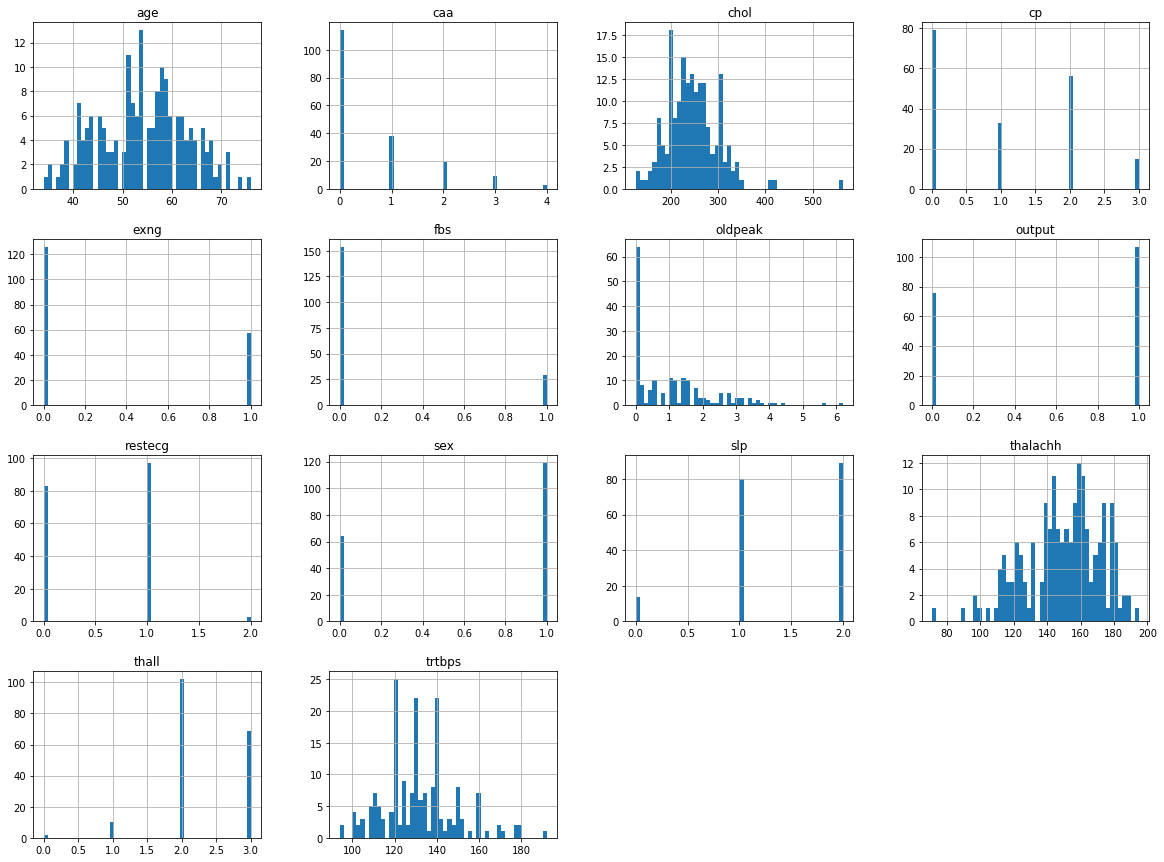

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
train_heart_data.hist(bins=50, figsize=(20,15))
# save_fig("attribute_heart_attack_plots")
plt.show()

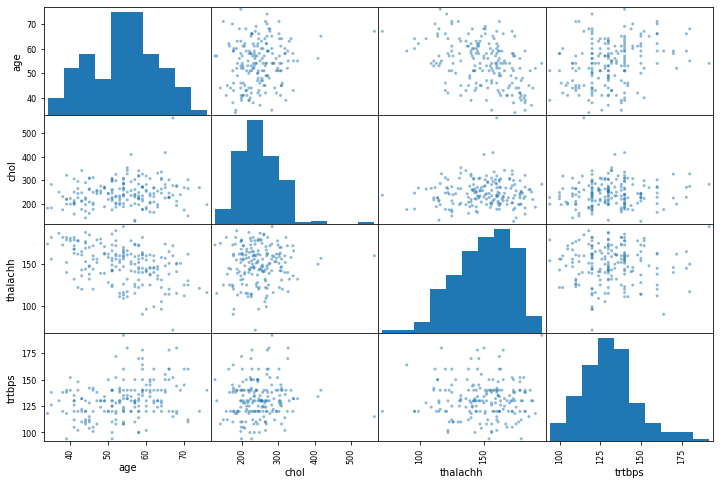

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["age", "chol", "thalachh", "trtbps"]
scatter_matrix(train_heart_data[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")
plt.show()

In [50]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=11)
sgd_clf.fit(train_heart_data_prepared, train_y.values.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=11, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def get_data_report(input_data, expected_output_data, model):
    calculated_output_data = model.predict(input_data)
    print(f"accuracy score: {accuracy_score(expected_output_data, calculated_output_data)}")
    print(f"precision score: {precision_score(expected_output_data, calculated_output_data)}")
    print(f"recall score: {recall_score(expected_output_data, calculated_output_data)}")

In [52]:
get_data_report(full_pipeline.fit_transform(valid_heart_data), valid_y_data, sgd_clf)

# valid_predictions = sgd_clf.predict(valid_heart_data)

# print(f"accuracy score: {accuracy_score(valid_y_data, valid_predictions)}")
# print(f"precision score: {precision_score(valid_y_data, valid_predictions)}")
# print(f"recall score: {recall_score(valid_y_data, valid_predictions)}")

ValueError: X has 17 features per sample; expecting 18

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_heart_data, train_y_data, cv=3, scoring="accuracy")

array([0.72131148, 0.63934426, 0.54098361])

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=11)
forest_clf.fit(train_heart_data, train_y_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [31]:
get_data_report(train_heart_data, train_y_data, forest_clf)

accuracy score: 1.0
precision score: 1.0
recall score: 1.0


In [26]:
# valid_forest_predictions = forest_clf.predict(valid_heart_data)

# print(f"accuracy score: {accuracy_score(valid_y_data, valid_forest_predictions)}")
# print(f"precision score: {precision_score(valid_y_data, valid_forest_predictions)}")
# print(f"recall score: {recall_score(valid_y_data, valid_forest_predictions)}")

get_data_report(valid_heart_data, valid_y_data, forest_clf)

accuracy score: 1.0
precision score: 1.0
recall score: 1.0


In [27]:
get_data_report(test_heart_data, test_y_data, forest_clf)

# test_forest_predictions = forest_clf.predict(test_heart_data)

# print(f"accuracy score: {accuracy_score(test_y_data, test_forest_predictions)}")
# print(f"precision score: {precision_score(test_y_data, test_forest_predictions)}")

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
